## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation (LUNA)

American Express (AmEx) is one of the most influential payment card coorporations in the world and owning an AmEx card is a financial status that many people aim for. However, it is extremely hard to get approve for an AmEx card as AmEx, like other financial institutions, has a strong interest in assessing and managing credit risk. By analyzing risk factors associated with each individual, they aim to make informed decisions about extending credit and managing potential defaults. This will allow them to mitigate loss and profit, stay compliance to regulations, and optimize lending decisions. Particularly, they would like to identify potential defaulter to steer away from those customers. On the customer side, we all want to own an AmEx card ourselves so our model would allow customers to measure and improve their success probability before applying for an AmEx credit card.  

## Problem statement (KIARA)

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

## Data sources (Hoda)
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

## Stakeholders (KIARA)
Who cares? If you are successful, what difference will it make to them?

## Data quality check / cleaning / preparation (KIARA / HODA)

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

## Exploratory data analysis (HODA)

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

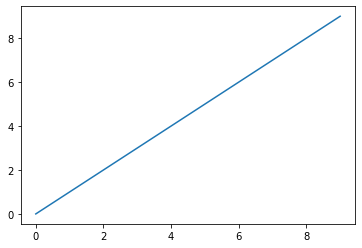

In [4]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

## Approach (ELENA)

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**


We used a Logistic Regression model, Tree models (Decision Tree, Bagging, Random Forest), Boosting models (Gradient boost, Ada Boost, XG boost), Lasso and Ridge Models, as well as Forward and Backward Selection. sdx

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Baseline Model with Data Scaling
*By Luna Nguyen*

We scale our data for all the models developed in this project. Therefore, the baseline model is an untuned logistic regression based on scaled data. No hyperparameter was tuned for the model, including the decision threhold. The model's a

To keep the baseline model consistent with other models later, I decided to also create a baseline model based on scaled data and tune this model's decision threshold, which turns out to be 0.188. This model's accuracy and recall are surprisingly good for an untuned model at 86.14% and 71.64% respectively.

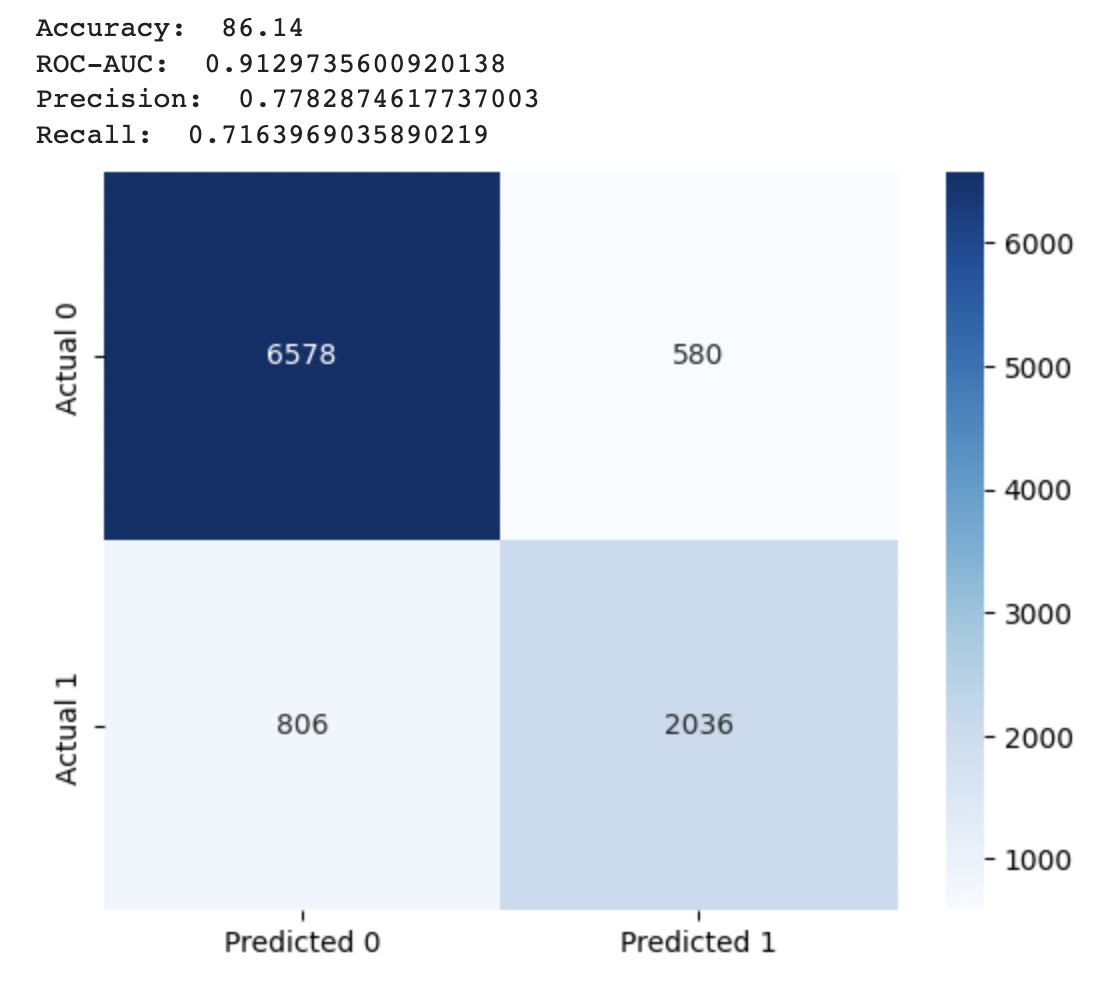

### Logistic Regression Model with Data Scaling
*By Luna Nguyen*

Starting with the baseline model, I decided to try to tune the C value to observe any improvement on the model's recall or accuracy. By doing a `GridSearchCV` with C values in the `range 10**np.linspace(-10, 10)`, `C = 0.014563484775012445` performs the best. The range was intentionally kept wide to ensure that the optimal C was captured. Then, I developed the model `tree = LogisticRegression(random_state=1, C = 0.014563484775012445)`. I then further tune its decision threshold to the threshold where recall and accuracy are roughly the same, which ends up being `threshold = 0.231`. This model recall is significantly improved compared to the baseline model (from 71.64% to 86.31) without compromising too much of the accuracy (from 86.14% to 85.43). Overall, this is one of our best model. One reason why the logistic regression model performs so well can be that the log(odds) of the response have a linear relationship with the predictors. 

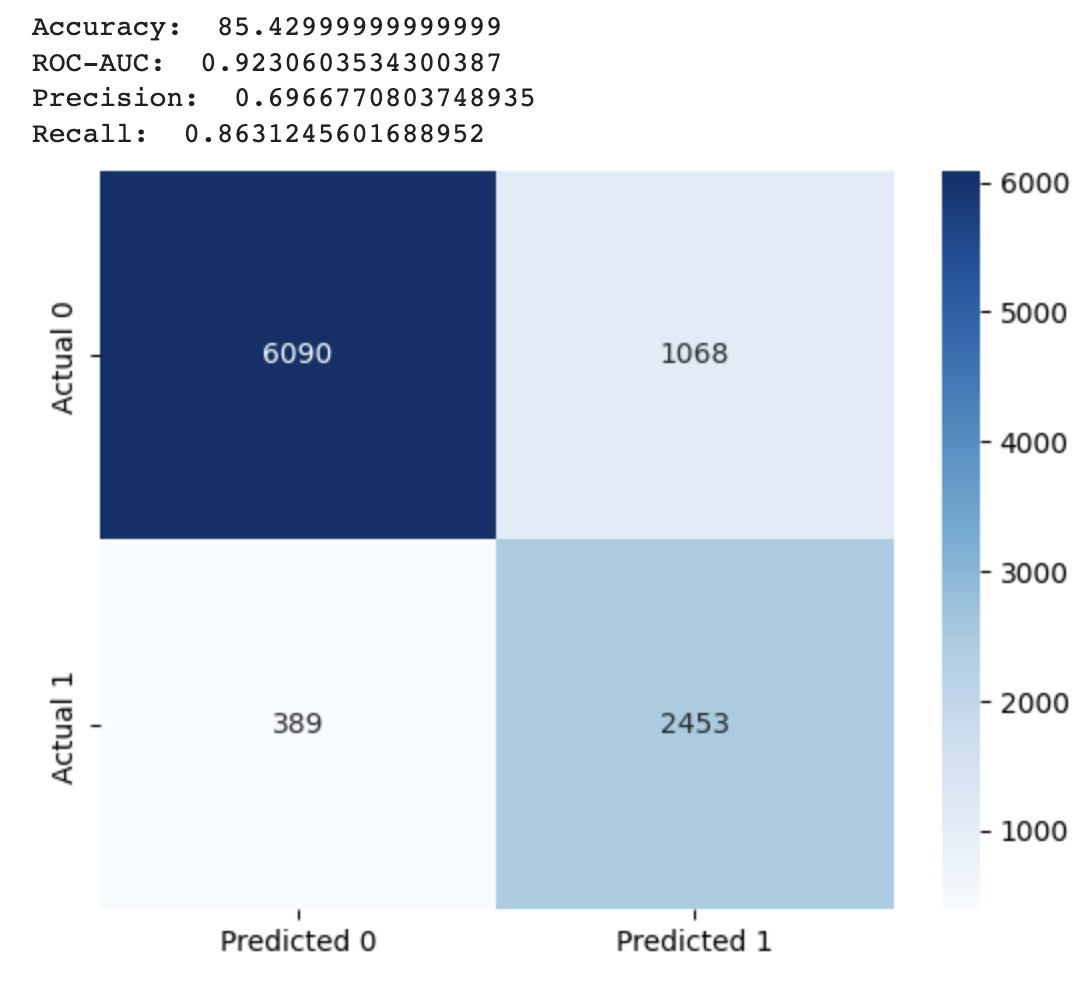

### Decision Tree Model with Data Scaling
*By Luna Nguyen*

I first created an baseline decision tree model `DecisionTreeClassifier(random_state = 1).fit(X_train, y_train)` to find the maximum depth and leaves that this tree can have and also compute all the alpha values for the Minimal Cost-Complexity Pruning path. As a result, the baseline decision tree is `26 levels` deep and has `339 leaves` and there are `232 possible alpha values`. Using all of these information, I did the following coarse grid search with a `max_features range of 163`, which is the total number of predictors. It is worth noting that `RandomizedGridSearch` with `n_iter = 1000` was used to reduce computation cost. 

`param_grid = {'max_depth': range(2, 26), 'max_leaf_nodes': range(0, 339),'max_features': range(1, 163), 'ccp_alpha':alphas}`

This coarse grid search gives me the following combination as the optimal combination: `{'max_leaf_nodes': 132, 'max_features': 144, 'max_depth': 3, 'ccp_alpha': 0.0006011115616725905}`.

I also did a finer grid search using a much narrower range for each hyperparameter, using the optimal value of from the previous grid search as the center. This time, I also use `RandomizedGridSearch`, but I use `n_iter = 2000` with the intention of search within a smaller range using more samples, with the hope of capturing the optimal combination while still mitigate compution cost.  

`param_grid = {'max_depth': range(2, 10), 'max_leaf_nodes': range(125, 140), 'max_features': range(140, 150), 'ccp_alpha':alphas}`

This fine grid search give me the following combination as the optimal combination: `{'max_leaf_nodes': 139, 'max_features': 148, 'max_depth': 8, 'ccp_alpha': 0.004313741792369128}`. I further tune the decision threshold for one where the accuracy and recall are roughly the same. This threshold turns out to be `0.231`. 

These hyperparameters and decision threshold produces a model with a good accuracy at 83.24% and a good recall at 81.32%. Even though these metrics are good, they are not as good as our logistic regression model.

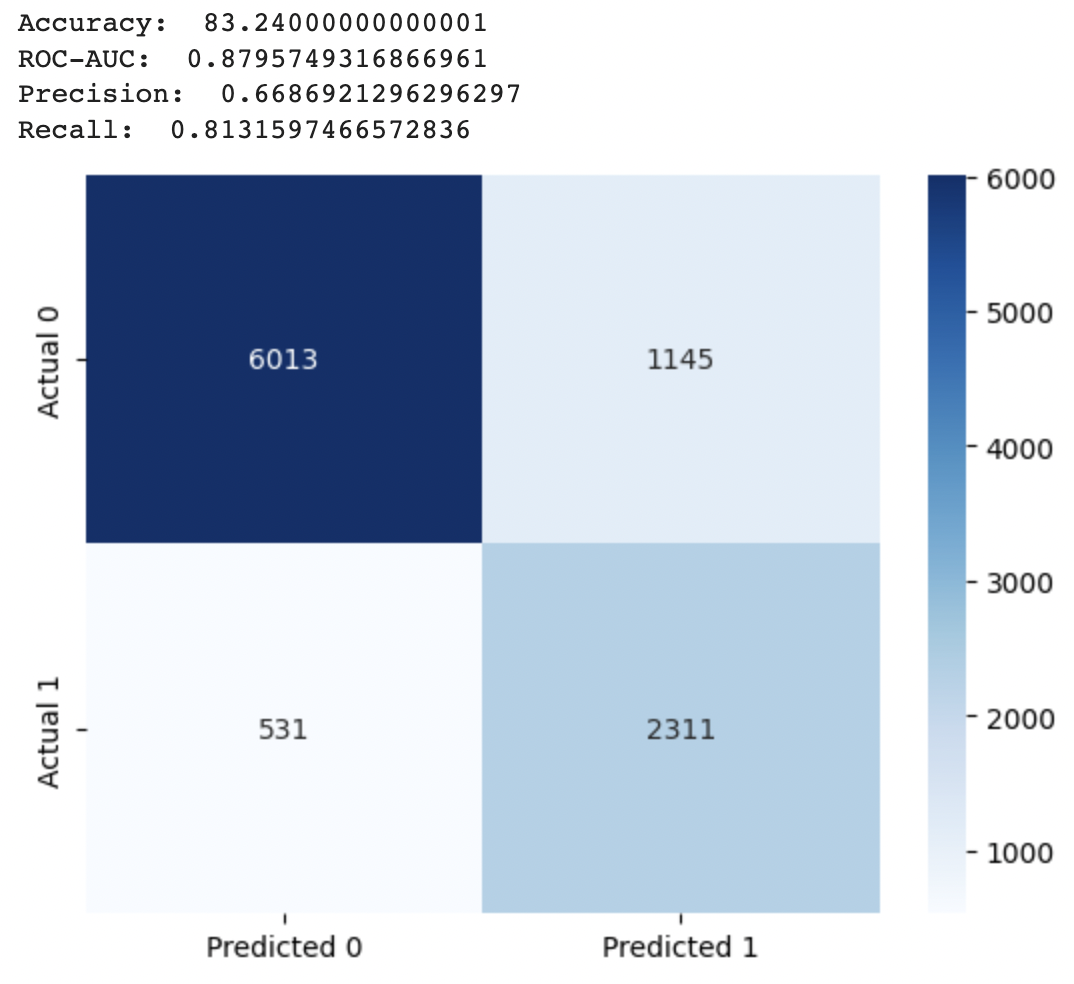

### MARS, AdaBoost & LightGBM
*By Sankaranarayanan Balasubramanian*

### Bagged trees & Random forest
*By Fiona Fe*

### XGBoost, Lasso, Ridge, Forward and Backward Stepwise Selection
*By Elena Llaguno*

XGBoost: 

Lasso: 

Ridge: 

Forward Stepwise: 

Backward Stepwise:

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble (ELENA)

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble (ELENA)
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models (LUNA)

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

### Innovative ensembling methods (FORGET FOR NOW)
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction (KIARA/ELENA) others add

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s) (HODA)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Luna Nguyen</td>
    <td>Baseline Model, Logistic Regression, & Decision Tree</td>
    <td>Ensembling</td>    
    <td>Ensemble of ensembles</td>
  </tr>
  <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>MARS, AdaBoost & LightGBM</td>
    <td>Ensembling</td>    
    <td>Stacking ensembles and voting ensemble</td>
  </tr>
    <tr>
    <td>Fiona Fe</td>
    <td>Bagged trees & Random forest</td>
    <td>Variable selection</td>    
    <td>Variable selection based on feature importance</td>
  </tr>
    <tr>
    <td>Elena Llaguno Cantu</td>
    <td>XGBoost, Lasso, Ridge and Stepwise Selection</td>
    <td>Ensembling</td>    
    <td>Voting Ensemble & stacking ensemble</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.